In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2 

In [169]:
df = pd.read_csv('/home/wot-ashish/code-Ashish/Zenml_Learning/data/Stroke_Prediction_Indians.csv')
df.dropna(inplace=True) 
df.drop(columns=['ID'], inplace=True) 
df.head() 

,Age,Gender,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,...,Dietary Habits,Alcohol Consumption,Chronic Stress,Sleep Hours,Family History of Stroke,Education Level,Income Level,Stroke Risk Score,Region,Stroke Occurrence
0,78,Female,0,0,1,Private,Rural,267.30,36.2,Formerly smoked,...,Non-Vegetarian,0,0,11,0,Tertiary,Middle,88,South,0
1,60,Female,0,0,0,Private,Rural,207.24,19.8,Never smoked,...,Vegetarian,0,0,9,0,Secondary,High,56,East,0
2,69,Male,0,0,0,Private,Urban,161.30,34.5,Never smoked,...,Mixed,1,0,3,0,Secondary,High,63,North,1
3,43,Male,0,0,1,Never Worked,Urban,247.49,48.8,Never smoked,...,Mixed,0,1,4,0,Tertiary,Middle,93,South,0
4,30,Female,0,0,1,Government,Urban,116.57,31.3,Formerly smoked,...,Mixed,0,1,9,0,Secondary,High,99,West,0


In [170]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.shape, y.shape 

((172000, 20), (172000,))

In [171]:
categorical_feature = X.select_dtypes(include = ['object']).columns.tolist()
categorical_feature

['Gender',
 'Work Type',
 'Residence Type',
 'Smoking Status',
 'Physical Activity',
 'Dietary Habits',
 'Education Level',
 'Income Level',
 'Region']

In [172]:
for idx, col in enumerate(categorical_feature):
        print(f"{idx}.{col} : {df[col].unique()}") 


0.Gender : ['Female' 'Male' 'Other']
1.Work Type : ['Private' 'Never Worked' 'Government' 'Children' 'Self-employed']
2.Residence Type : ['Rural' 'Urban']
3.Smoking Status : ['Formerly smoked' 'Never smoked' 'Unknown' 'Smokes']
4.Physical Activity : ['Sedentary' 'Light' 'Active' 'Moderate']
5.Dietary Habits : ['Non-Vegetarian' 'Vegetarian' 'Mixed']
6.Education Level : ['Tertiary' 'Secondary' 'No education' 'Primary']
7.Income Level : ['Middle' 'High' 'Low']
8.Region : ['South' 'East' 'North' 'West']


In [173]:
# mannually checked that which columns is belongs to the which kind of the caegories.. 

one_hot_categories = ['Gender', 'Residence Type',"Region"]
label_categories = ["Work Type","Smoking Status",'Dietary Habits', "Education Level"]
ordinal_categories = ["Income Level", "Physical Activity"]

ordinal_encoding_mapping = {"Income Level" : ['Low', 'High', 'Middle'  ], 
                          "Physical Activity" : ["Sedentary" , "Light", "Moderate","Active" ] } 

# applied the encoding techniques according to given columns type
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer 

colmn_transformer = ColumnTransformer( 
    [("one-hot-encoder", OneHotEncoder(sparse_output=False), one_hot_categories)], 
    verbose_feature_names_out=True )

transformed_x = colmn_transformer.fit_transform(X) 
X = pd.concat([
    X[[col for col in X.columns.tolist()]],
    pd.DataFrame( transformed_x, columns= colmn_transformer.get_feature_names_out() )],
    axis =1 
)
for col in label_categories: 
    X[col] = LabelEncoder().fit_transform(X[[col]] )

for col in ordinal_categories: 
    X[col] = OrdinalEncoder(categories= [ordinal_encoding_mapping.get(col)]).fit_transform(X[[col]]) 


/home/wot-ashish/code-Ashish/Zenml_Learning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wot-ashish/code-Ashish/Zenml_Learning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wot-ashish/code-Ashish/Zenml_Learning/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wot-ashish/code-Ashish/Zenml_Learning/.venv/lib/python3.10/site-packages/sklear

In [174]:

X.drop(columns=categorical_feature, inplace=True)
X.dtypes # no longer object there right  

Age                                        int64
Hypertension                               int64
Heart Disease                              int64
Ever Married                               int64
Average Glucose Level                    float64
BMI                                      float64
Alcohol Consumption                        int64
Chronic Stress                             int64
Sleep Hours                                int64
Family History of Stroke                   int64
Stroke Risk Score                          int64
one-hot-encoder__Gender_Female           float64
one-hot-encoder__Gender_Male             float64
one-hot-encoder__Gender_Other            float64
one-hot-encoder__Residence Type_Rural    float64
one-hot-encoder__Residence Type_Urban    float64
one-hot-encoder__Region_East             float64
one-hot-encoder__Region_North            float64
one-hot-encoder__Region_South            float64
one-hot-encoder__Region_West             float64
dtype: object

In [175]:
from sklearn.feature_selection import SelectKBest, chi2 

selector = SelectKBest(chi2, k = 15) 

selector.fit(X=X, y=y) 

SelectKBest(k=15, score_func=<function chi2 at 0x73336f850ca0>)

In [180]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 


random_forest_selector = DecisionTreeClassifier()
random_forest_selector.fit(X, y) 

DecisionTreeClassifier()

In [192]:
random_forest_selector.feature_importances_ 

array([0.13733963, 0.01806284, 0.01236326, 0.01900086, 0.23811058,
       0.20716202, 0.00794077, 0.02183217, 0.07057964, 0.0184937 ,
       0.13943949, 0.01652422, 0.01415955, 0.0068704 , 0.01360159,
       0.01416022, 0.01428606, 0.00297694, 0.01329908, 0.01379697])

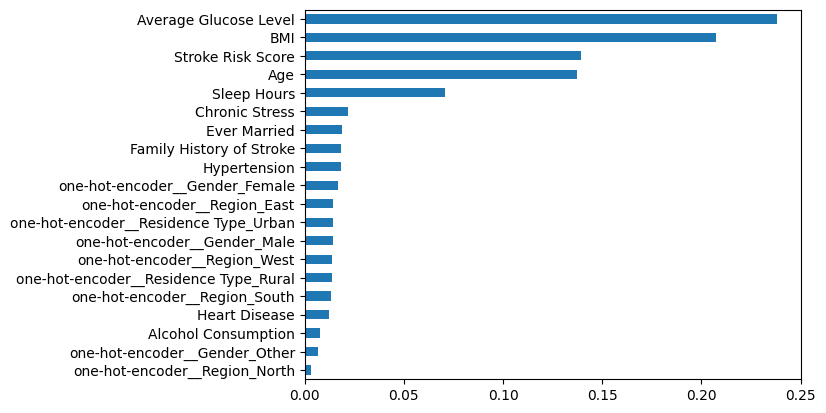

In [207]:
fig = pd.Series(random_forest_selector.feature_importances_, index=X.columns.tolist()).sort_values().plot(kind='barh') 
fig.plot() 
plt.savefig("../.assets/feature_selection.png")